In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic_train.csv')
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.shape

(891, 13)

In [6]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***We are going to Drop cabin feature Age and Embarked feature will be imputed with values***

In [5]:
###checking overall heath of the Dataset####
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations===>>>>

1. we are going to drop several columns Unnamed:0,Name,Ticket,Cabin on a realistic note the features are having null relationship,but pre dropping we will check the correllation with survived.

2. Dispersion and central tendency are looking satisfactory for PassengerId

3. Measure of central tendency and dispersion are looking satisfactory for PClass their are 3 values in Pclass i.e. 1,2,3

4. Age column is showing missing values we are going to impute and will check for outliers

5. Number of siblings present for passengers will be visualized and decision will be taken accordingly as of now overall health is looking satisfactory

6. No. of Parents in quantity is given for passengers as of now it is looking of no use,we will visualize and finalize the decision

7. Fare column of Passengers is showing Skewness this will be visualized and decision will be taken accordingly

In [7]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Unnamed: 0    -0.005007
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

***Correllation of features to Label has been taken and will be used for Data cleaning***

In [9]:
###dropping unnecessay columns####
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['Name'],inplace=True)
df.drop(columns=['Ticket'],inplace=True)
df.drop(columns=['Cabin'],inplace=True)

In [22]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1


In [13]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Sex'].replace({'male':0,'female':1},inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

**We have Imputed the values and Encoded the same in Age and Embarked Feature***

In [15]:
df['Age'].isnull().sum()

0

In [17]:
df['Embarked'].isnull().sum()

0

***No Nan values and encoding has also been applied***

# Lets check for outliers

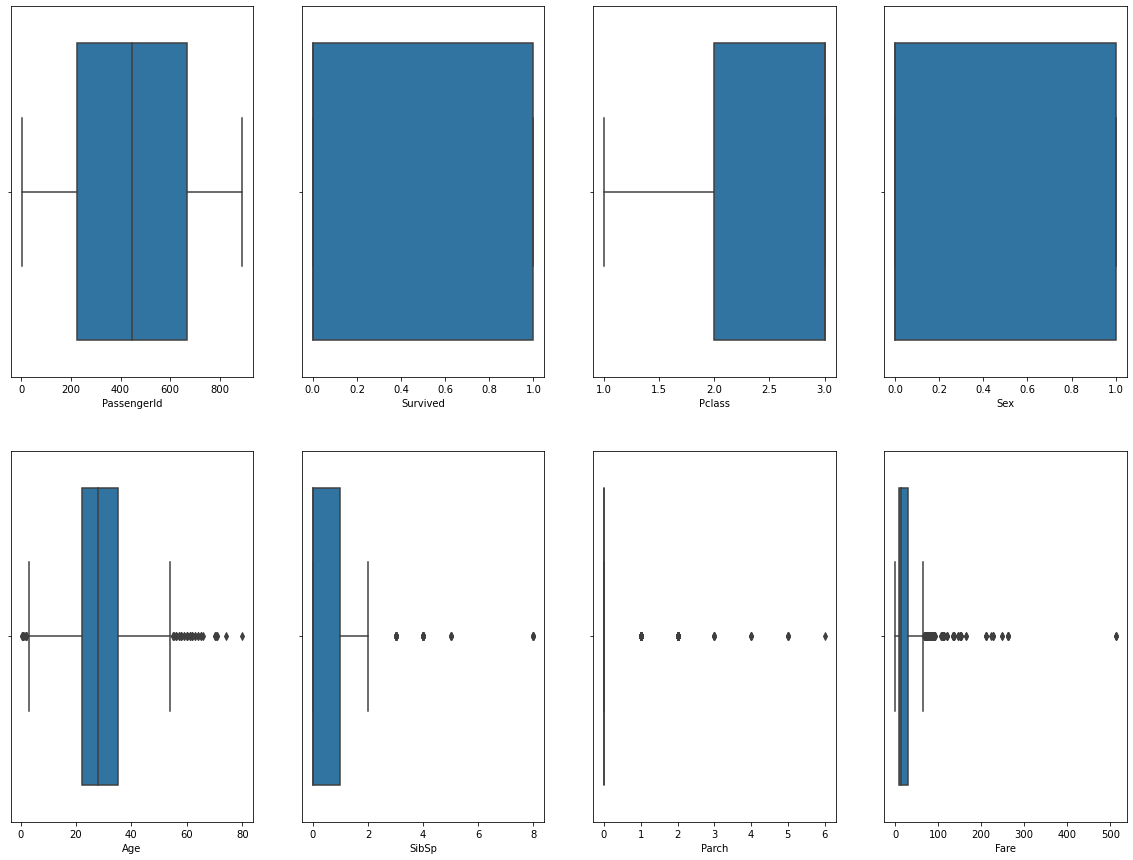

In [21]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1
    
plt.show() 

***Age(Higher and lower sides), SibSp(higher side),parch(Higher side),Fare(Higher side)***
We will do further analysis and remove the outliers for our desired feature only, we will check the importance of features through visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

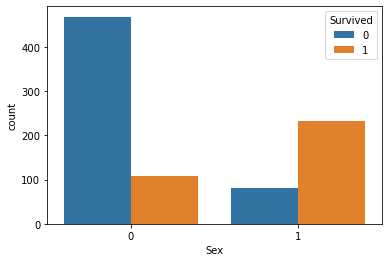

In [18]:
sns.countplot(x='Sex',hue='Survived',data=df)

***We have very less survival of males as compared to females***

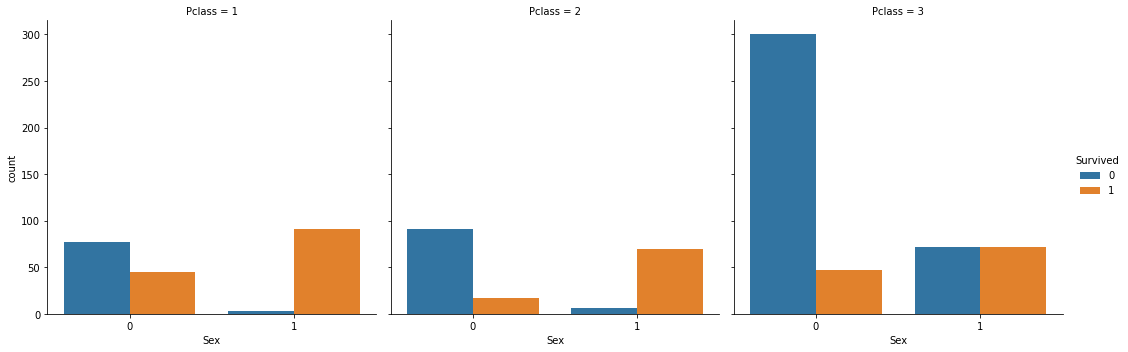

In [20]:
sns.catplot(x='Sex',hue='Survived',col='Pclass',kind='count',data=df)

*** In Pclass=3, we are observing the highest fatality of Males as compared to Pclass=1 & Pclass=2
Females in Pclass=1 has the least fatality counts wherein Pclass=2 Females survival count is almost 80% of Males dead counts***

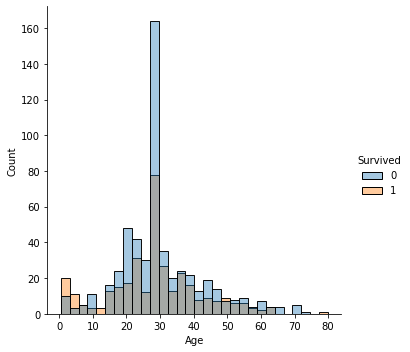

In [23]:
sns.displot(x = 'Age', hue = 'Survived', alpha = 0.4,
            data = df, kind = 'hist')

***More the age less the survival Rate of passengers***

sns.catplot(data=df,x='SibSp',hue='Survived',kind='count')

*** With no Siblings their are around 400 deads and 200 passengers survived wherein with increase in number of siblings their is a decrease in survival counts***

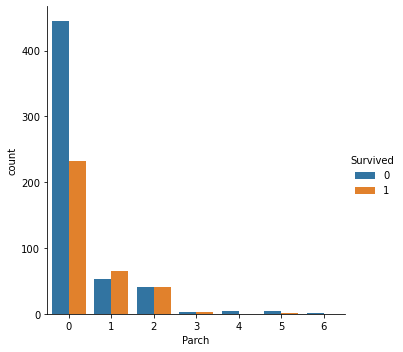

In [25]:
sns.catplot(x='Parch',data=df,kind='count',hue='Survived')

 ***With no parents their are above 400 deads and approx 220 passengers survived wherein with increase in number of parents their is a decrease in survival counts and their is also a decrease in dead counts***

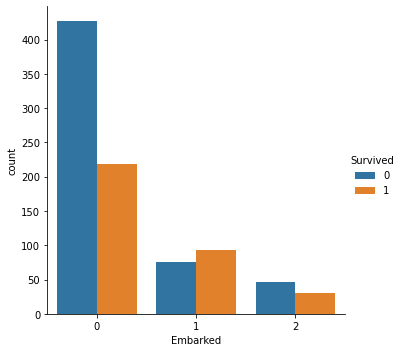

In [26]:
sns.catplot(data=df,x='Embarked',hue='Survived',kind='count')

**Pasengers boarded from 0 station i.e. 'S' has the most Dead counts as compared to 1 i.e. 'c' and 2 i.e. 'Q'

<AxesSubplot:xlabel='Fare', ylabel='Density'>

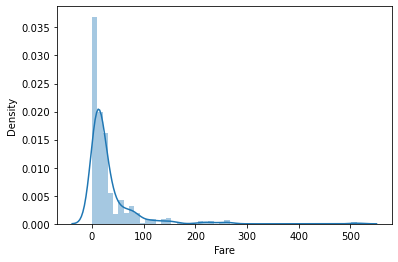

In [27]:
sns.distplot(df['Fare'])

***Fare is showing ouliers as also confirmed in BoxPlot  and feature is also of no use,we are going to delete the same***

In [28]:
##deleting identified not useful features as verified from visualization####
df.drop(columns=['Parch'],inplace=True)
df.drop(columns=['Fare'],inplace=True)

In [29]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Embarked
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,1


# Removing outliers

In [38]:
##3importing necessary library and using z score for outliers###
from scipy.stats import zscore
z= np.abs(zscore(df))
z.shape

(891, 7)

In [41]:
##Applying thumb rule of 3 STD###
df_new= df[(z<3).all(axis=1)]
print("Old Data frame shape====>",df.shape)
print("New data frame shape====>",df_new.shape)


Old Data frame shape====> (891, 7)
New data frame shape====> (854, 7)


<AxesSubplot:xlabel='Age'>

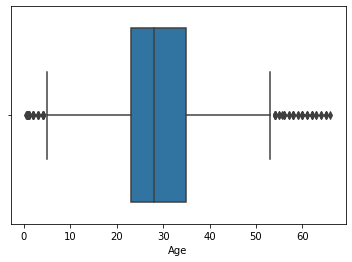

In [42]:
sns.boxplot(df_new['Age'])

<AxesSubplot:xlabel='SibSp'>

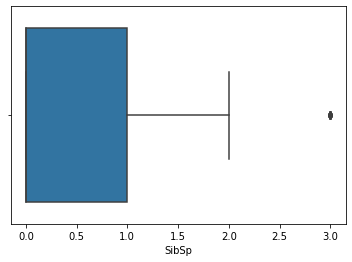

In [44]:
sns.boxplot(df_new['SibSp'])

***we are able to handle the outlers as Data set is small we are not deleting the outliers in copious amount***

<AxesSubplot:xlabel='Age', ylabel='Density'>

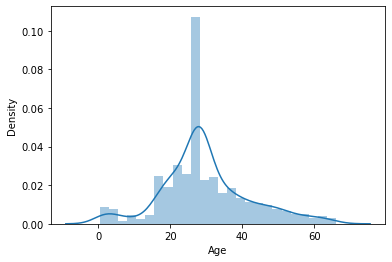

In [45]:
sns.distplot(df_new['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

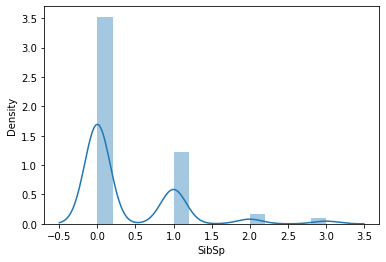

In [46]:
sns.distplot(df_new['SibSp'])

# Outliers is in complete controll

# We are plotting stripplot to analyse relationship b/w Feature and Label
## Every Feature VS Label

In [47]:
x = df_new.drop(columns=['Survived'])
y = df_new['Survived']

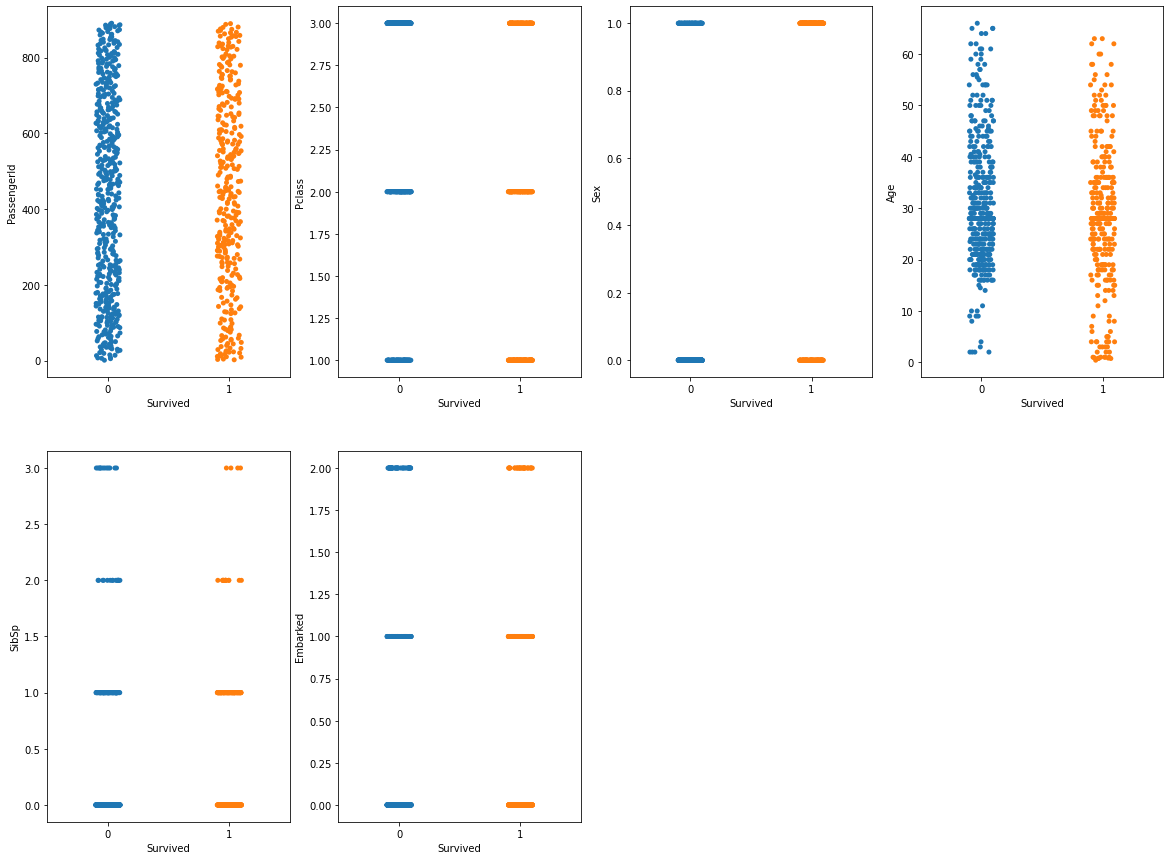

In [48]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(y,x[column])
        
    
    plotnumber+=1
    
plt.show() 

***Here we can see that every Feature is having relationship with Label ,hence we are not going to delete any other Feature****

# Lets Recheck again by applying VIF(Variance_inflation_factor) for checking Multi-Collinearity problem

In [49]:
#Importing necessary Libraries
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [50]:
#Creating object for Standard Scaler
scaler = StandardScaler()

In [51]:
x_scaled = scaler.fit_transform(x)

In [52]:
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [53]:
vif['Features']=x.columns
vif

,VIF,Features
0,1.007895,PassengerId
1,1.161516,Pclass
2,1.099566,Sex
3,1.155933,Age
4,1.079080,SibSp
5,1.028677,Embarked


# We can say that score is below 5 ,hence their is no Multi-collinearity problem exists in features,Lets proceed with train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=1)

In [55]:
LR=LogisticRegression()

In [56]:
LR.fit(x_train,y_train)

LogisticRegression()

# Defining function to print Training,Testing score and Classification Report

In [63]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print("\n======Training Score=========")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:2f}%")
    
    elif train==False:
        y_pred=clf.predict(x_test)
        print("\n====Test Result is")
        print(f"\nAccuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%")
        print("\nClassification Report\n",classification_report(y_test,y_pred))
        
              
        

In [64]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:82.244556%

====Test Result is

Accuracy Score:74.32%

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       155
           1       0.67      0.70      0.68       102

    accuracy                           0.74       257
   macro avg       0.73      0.74      0.73       257
weighted avg       0.75      0.74      0.74       257



# Confusion Matrix

In [67]:
y_pred = LR.predict(x_test)

In [71]:
print("Confusion Matrix ========>\n",confusion_matrix(y_test,y_pred))

Confusion Matrix ========>
 [[120  35]
 [ 31  71]]


# Cross Validations

In [73]:
from sklearn.model_selection import KFold,cross_val_score

# Cross validation score

In [74]:
cross_val_score(LR,x_scaled,y,cv=5).mean()

0.7869074647402821

# Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [76]:
params={'C':[1,2,3],
       'random_state':[1,2,3,4],
       'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [77]:
grid_search = GridSearchCV(estimator=LR,param_grid=params)

In [78]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'random_state': [1, 2, 3, 4],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [79]:
grid_search.best_params_

{'C': 1, 'random_state': 1, 'solver': 'newton-cg'}

In [80]:
LR=LogisticRegression(C=1,random_state=1,solver='newton-cg')

In [82]:
LR.fit(x_train,y_train)

LogisticRegression(C=1, random_state=1, solver='newton-cg')

# Score Post Hyperparameter Tuning

In [91]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:82.244556%

====Test Result is

Accuracy Score:74.32%

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       155
           1       0.67      0.70      0.68       102

    accuracy                           0.74       257
   macro avg       0.73      0.74      0.73       257
weighted avg       0.75      0.74      0.74       257



In [88]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [92]:
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.7351359898798229

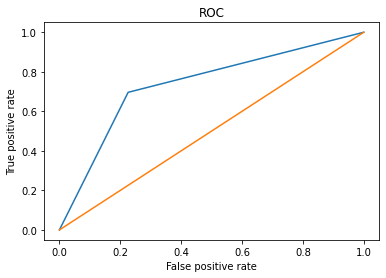

In [90]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate" )
plt.title("ROC")


plt.show()

# This is about Logistic Regression, we got a good score with Logistic Regression ,now Lets move to KNN algorithm for model building

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier()

In [95]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

# Printing Training,Testing score and Classification report

In [96]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:85.762144%

====Test Result is

Accuracy Score:76.26%

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       155
           1       0.70      0.70      0.70       102

    accuracy                           0.76       257
   macro avg       0.75      0.75      0.75       257
weighted avg       0.76      0.76      0.76       257



# Cross validation score

In [97]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.8068249054007568

# Confusion Matrix

In [99]:
y_pred= knn.predict(x_test)

In [100]:
confusion_matrix(y_test,y_pred)

array([[125,  30],
       [ 31,  71]], dtype=int64)

# Hyperparameter Tuning

In [101]:
params = {'algorithm':['kd_tree','brute'],
         'leaf_size':[3,5,6,7],
         'n_neighbors':[3,5,7,9,11]}

In [102]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'random_state': [1, 2, 3, 4],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [103]:
grid_search.best_params_

{'C': 1, 'random_state': 1, 'solver': 'newton-cg'}

In [104]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=9)

In [105]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [106]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:85.092127%

====Test Result is

Accuracy Score:77.82%

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       155
           1       0.73      0.70      0.71       102

    accuracy                           0.78       257
   macro avg       0.77      0.76      0.77       257
weighted avg       0.78      0.78      0.78       257



In [107]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

# AUC Score

In [108]:
auc_score = roc_auc_score(y_test,y_pred)
auc_score
           

0.7512650221378874

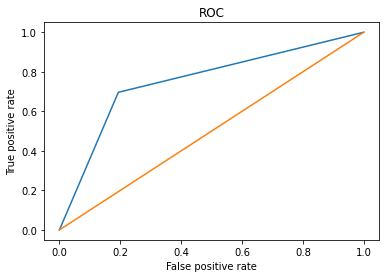

In [109]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate" )
plt.title("ROC")


plt.show()

# This is about KNN,again satisfactory score.
## Lets try with RandomForestClassifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
Rf= RandomForestClassifier()

In [112]:
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [113]:
metric_score(Rf,x_train,x_test,y_train,y_test,train=True)
metric_score(Rf,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:100.000000%

====Test Result is

Accuracy Score:78.60%

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       155
           1       0.72      0.75      0.73       102

    accuracy                           0.79       257
   macro avg       0.78      0.78      0.78       257
weighted avg       0.79      0.79      0.79       257



# Cross validation

In [114]:
cross_val_score(Rf,x_scaled,y,cv=5).mean()

0.7927898176814586

In [115]:
y_pred= Rf.predict(x_test)

In [116]:
confusion_matrix(y_test,y_pred)

array([[126,  29],
       [ 26,  76]], dtype=int64)

# Hyperparameter tuning

In [120]:
params = {'n_estimators':[13,15],
         'criterion':['gini','entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_split':[5,6]}

In [121]:
grd_search = GridSearchCV(estimator=Rf,param_grid=params)

In [122]:
grd_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_split': [5, 6],
                         'n_estimators': [13, 15]})

In [124]:
grd_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 6,
 'n_estimators': 15}

In [125]:
Rf = RandomForestClassifier(criterion='gini',max_depth=15,min_samples_split=6,n_estimators=15)

In [126]:
Rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=6, n_estimators=15)

# Score post HyperParameterTuning

In [127]:
metric_score(Rf,x_train,x_test,y_train,y_test,train=True)
metric_score(Rf,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:92.462312%

====Test Result is

Accuracy Score:79.77%

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       155
           1       0.73      0.78      0.75       102

    accuracy                           0.80       257
   macro avg       0.79      0.80      0.79       257
weighted avg       0.80      0.80      0.80       257



In [128]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

# AUC Score

In [129]:
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.7790006325110689

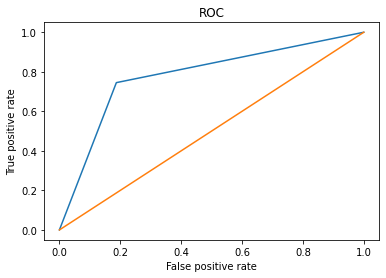

In [130]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate" )
plt.title("ROC")


plt.show()

# Lets try GradientBoostingClassifier

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
gbc=GradientBoostingClassifier()

In [134]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [135]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:85.092127%

====Test Result is

Accuracy Score:77.82%

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       155
           1       0.73      0.70      0.71       102

    accuracy                           0.78       257
   macro avg       0.77      0.76      0.77       257
weighted avg       0.78      0.78      0.78       257



# Cross validation score

In [136]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.7974131406948745

# Confusion Matrix

In [137]:
confusion_matrix(y_test,y_pred)

array([[126,  29],
       [ 26,  76]], dtype=int64)

# Hyperparameter Tuning

In [138]:
params={'max_depth':[1,2,3,4,5],
       'min_samples_split':[2,4,6],
       'learning_rate':[0.1,0.2,0.3,0.4]}

In [139]:
grid_s = GridSearchCV(estimator=gbc,param_grid=params)

In [140]:
grid_s.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6]})

In [141]:
grid_s.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 6}

In [142]:
gbc= GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=6)

In [144]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(min_samples_split=6)

# Score post Hyperparameter tuning

In [145]:
metric_score(gbc,x_train,x_test,y_train,y_test,train=True)
metric_score(gbc,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:91.457286%

====Test Result is

Accuracy Score:79.38%

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       155
           1       0.75      0.72      0.73       102

    accuracy                           0.79       257
   macro avg       0.79      0.78      0.78       257
weighted avg       0.79      0.79      0.79       257



In [146]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [147]:
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.7790006325110689

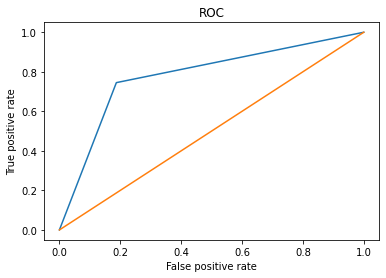

In [148]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate" )
plt.title("ROC")


plt.show()

In [149]:
from sklearn.metrics import plot_roc_curve

# ROC_AUC Curve of Training Data

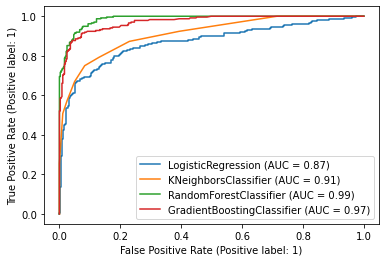

In [150]:
disp= plot_roc_curve(LR,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(Rf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# Testing Data

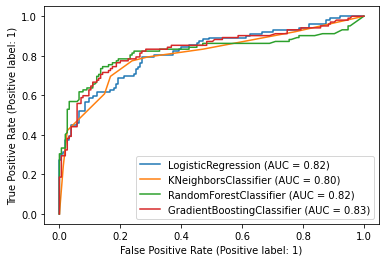

In [151]:
disp= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# According to my Observation Logistic Regression is the Best fitted Model

In [152]:
import pickle

In [153]:
pickle.dump(LR,open('Regression_Titanic_Survived','wb'))

# Model is completed